In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import MDAnalysis as mda
import MDAnalysis.analysis.rms
import numpy as np
import plot
import seaborn as sns

# teal: #0099AB
# color = "#0099AB" 
# palatinate: #68246D

color = "#68246D"

<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.


# QM/MM plots

In [2]:
dir = "/home/jguven/Desktop/alchemistry_paper/DISTANCE_RMSD/"

## OH

### RMSD active site

0.9252430999999999
0.8867
0.16261550634053937


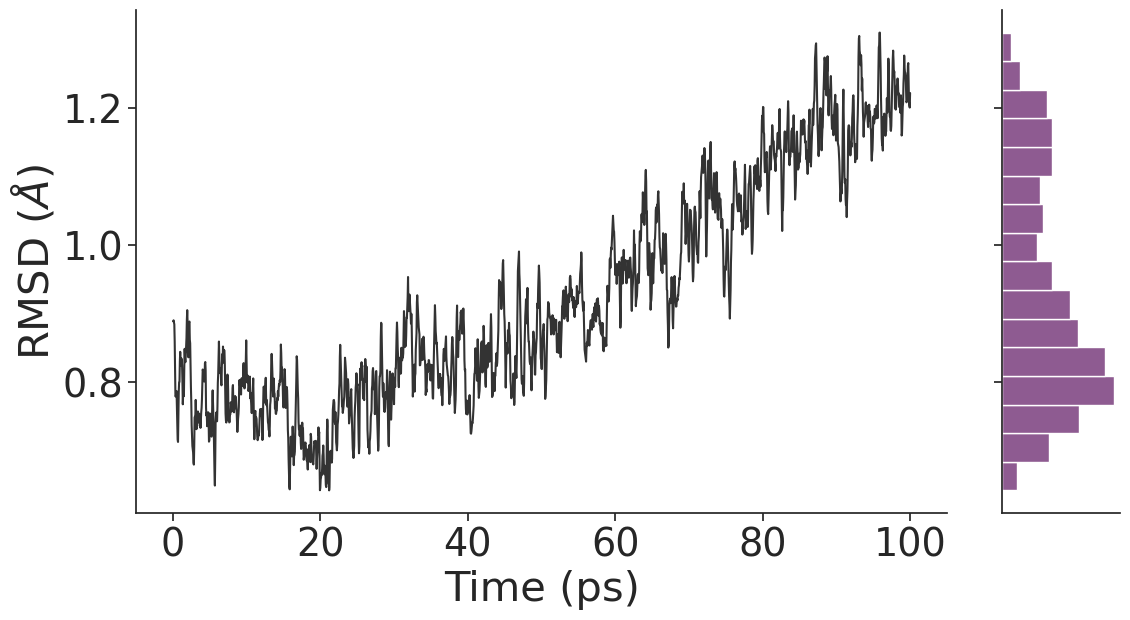

In [5]:
data = pd.read_csv(f"{dir}/OH/rmsd-active-site.dat", sep="\s+", names=["frames", "distance"], header=0)
# print(data.head())
frames = data["frames"].to_numpy()
time = frames * 0.05
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
med = np.median(dataframe["distance"])
print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ps)", r"RMSD ($\AA$)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/qmmm_OH_active_site_rmsd.pdf", dpi=1000)

### Lig - Zn distance

4.2301602
4.113049999999999
0.3984009221073164


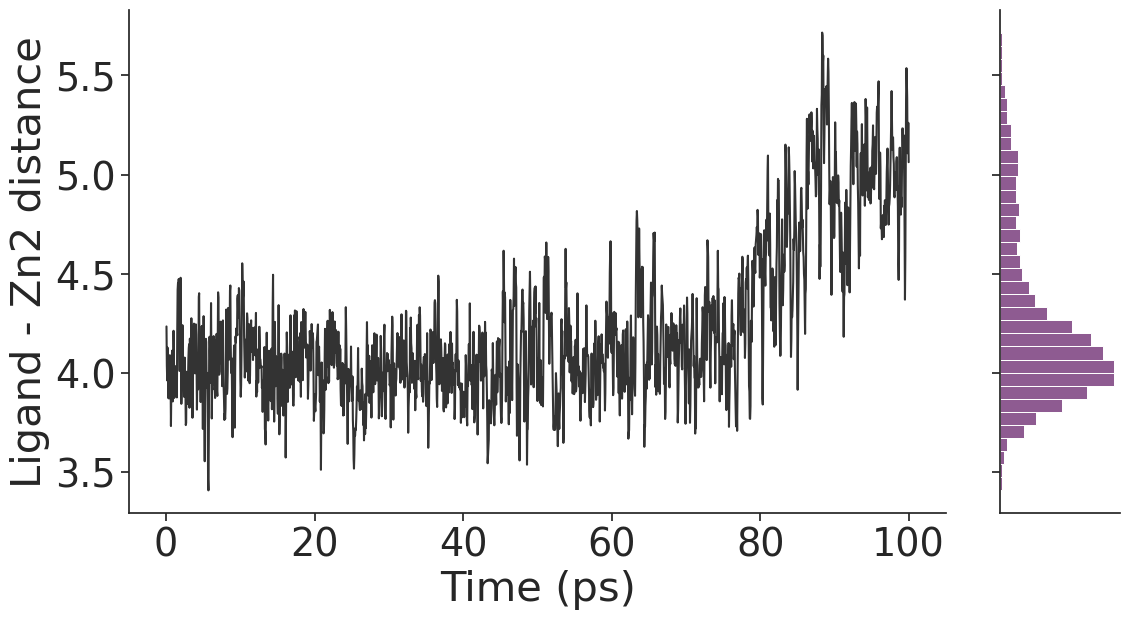

In [11]:
data = pd.read_csv(f"{dir}/OH/LIG-ZN2.dat", sep="\s+", names=["frames", "distance"], header=0)
# print(data.head())
frames = data["frames"].to_numpy()
time = frames * 0.05
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
med = np.median(dataframe["distance"])
print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ps)", "Ligand - Zn2 distance")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/qmmm_OH_lig_zn_distance.pdf", dpi=1000)

## ZN - ZN distance

3.565539
0.10691731762909132


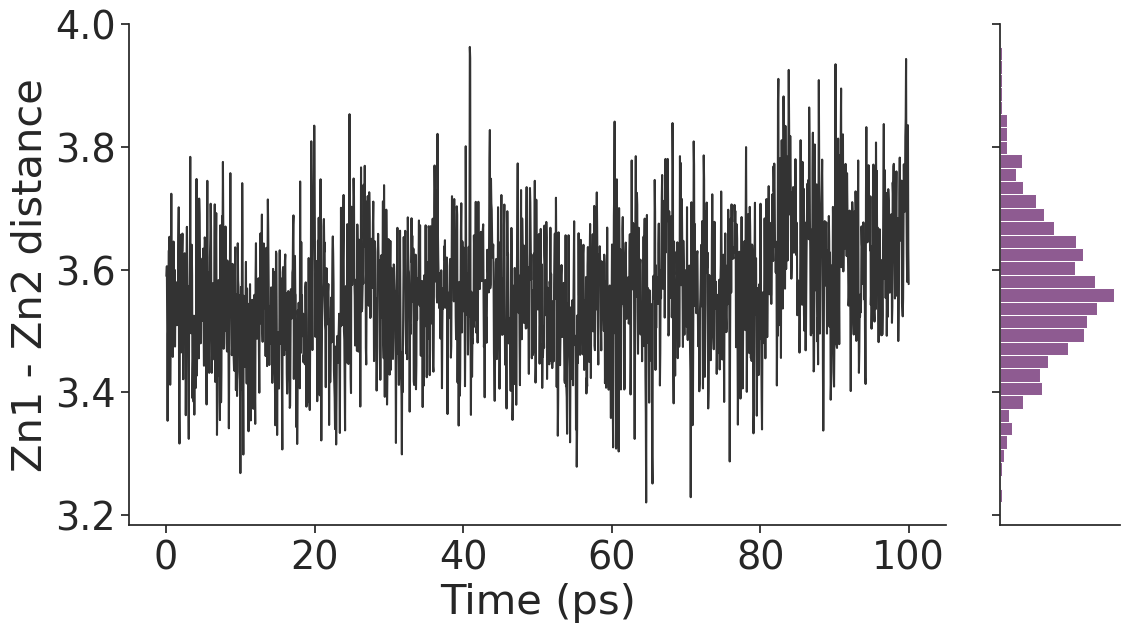

In [6]:
data = pd.read_csv(f"{dir}/OH/ZN1-ZN2.dat", sep="\s+", names=["frames", "distance"], header=0)
# print(data.head())
frames = data["frames"].to_numpy()
time = frames * 0.05
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
# med = np.median(dataframe["distance"])
# print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ps)", "Zn1 - Zn2 distance")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/qmmm_OH_zn_zn_distance.pdf", dpi=1000)

# MD RMSDs

## model 0

1.32463628
1.332
0.09981484634943642


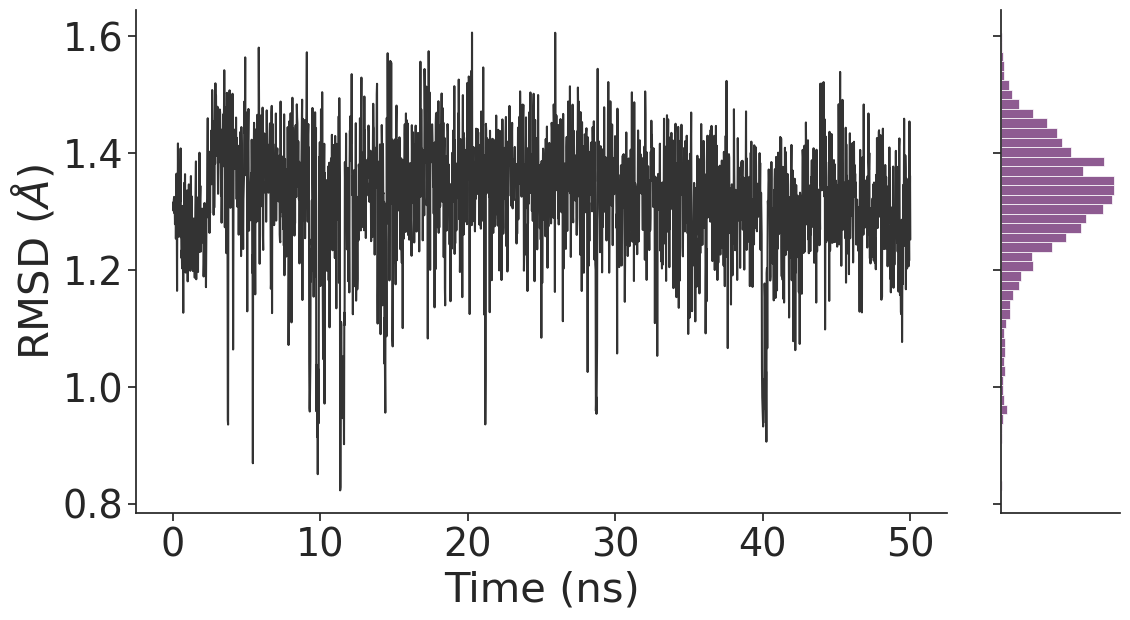

In [6]:
proj_dir = "/home/jguven/projects/alchemistry/model_0_vim2/md/outputs/ligand_16/rmsd_cpptraj/"
data = pd.read_csv(f"{proj_dir}/rmsd-active-site.dat", sep="\s+", names=["frames", "distance"], header=0)
# print(data.head())
frames = data["frames"].to_numpy()
time = frames / 50
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
med = np.median(dataframe["distance"])
print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ns)", r"RMSD ($\AA$)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/md_model_0_active_site_rmsd.pdf", dpi=1000)

## model 1

1.008927924
0.9738
0.24031727453150392


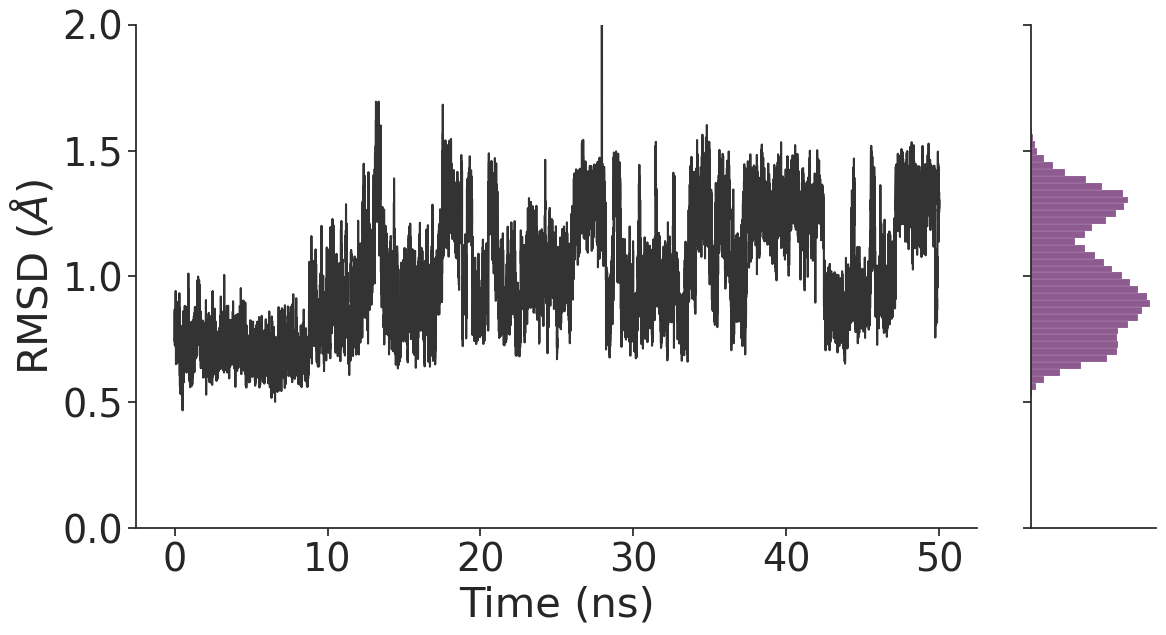

In [10]:
proj_dir = "/home/jguven/projects/alchemistry/model_1_vim2/md/outputs/ligand_16/rmsd_cpptraj/"
data = pd.read_csv(f"{proj_dir}/rmsd-active-site.dat", sep="\s+", names=["frames", "distance"], header=0)
# print(data.head())
frames = data["frames"].to_numpy()
time = frames / 500
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
med = np.median(dataframe["distance"])
print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ns)", r"RMSD ($\AA$)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.ylim(0, 2)
plt.savefig("/home/jguven/Desktop/alchemistry_paper/md_model_1_active_site_rmsd.pdf", dpi=1000)

## HOH

### RMSD

0.587564
0.58705
0.06624245160016347


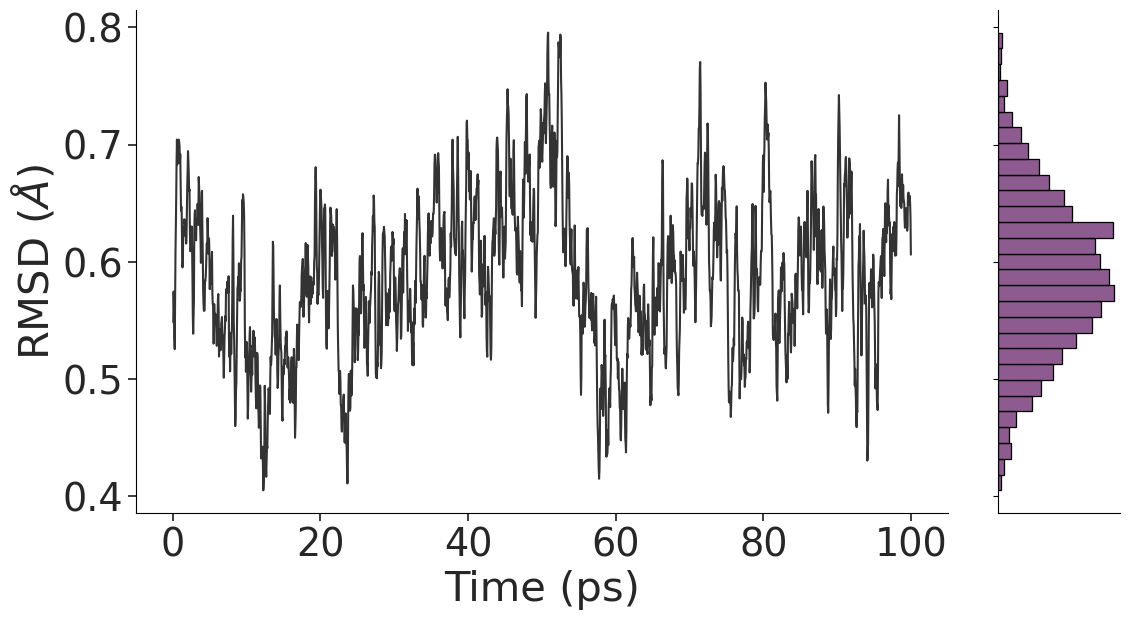

In [3]:
data = pd.read_csv(f"{dir}/WAT/rmsd-active-site.dat", sep="\s+", names=["frames", "distance"], header=0)
# print(data.head())
frames = data["frames"].to_numpy()
time = frames * 0.05
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
med = np.median(dataframe["distance"])
print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ps)", r"RMSD ($\AA$)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/qmmm_WAT_active_site_rmsd.pdf", dpi=1000)

### Lig - ZN distance

1.9942848000000002
1.98815
0.06672434330107715


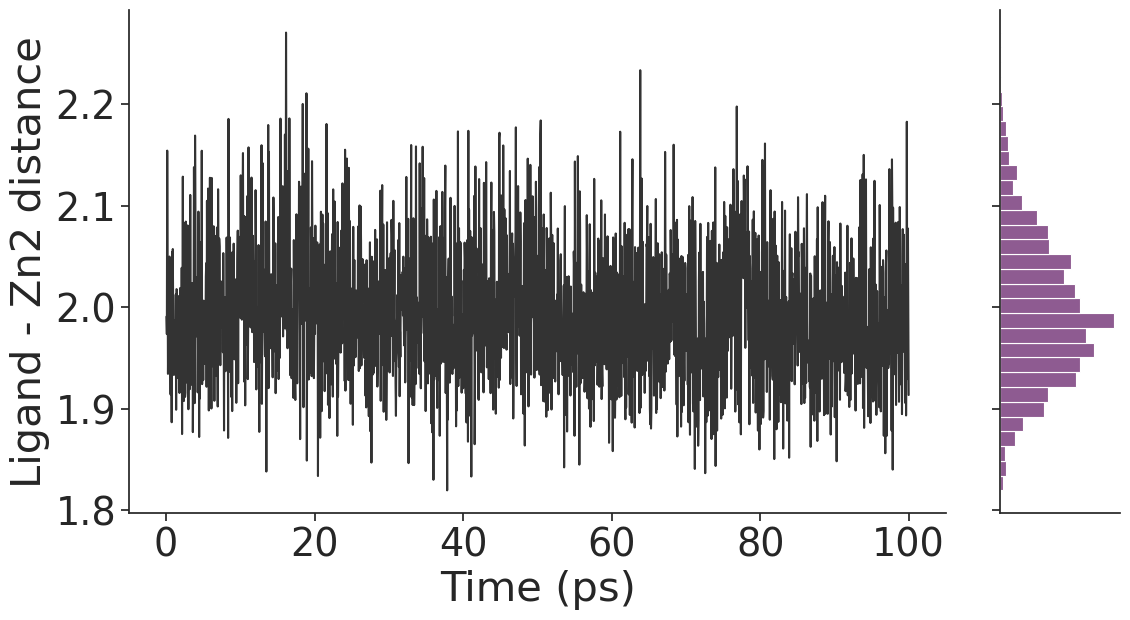

In [10]:
data = pd.read_csv(f"{dir}/WAT/LIG-ZN2.dat", sep="\s+", names=["frames", "distance"], header=0)
# print(data.head())
frames = data["frames"].to_numpy()
time = frames * 0.05
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
med = np.median(dataframe["distance"])
print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ps)", "Ligand - Zn2 distance")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/qmmm_WAT_lig_zn_distance.pdf", dpi=1000)

### ZN - ZN distance

4.7159723
0.2129774249837527


/home/jguven/Software/miniconda3/envs/obss-d/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/home/jguven/Software/miniconda3/envs/obss-d/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/home/jguven/Software/miniconda3/envs/obss-d/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


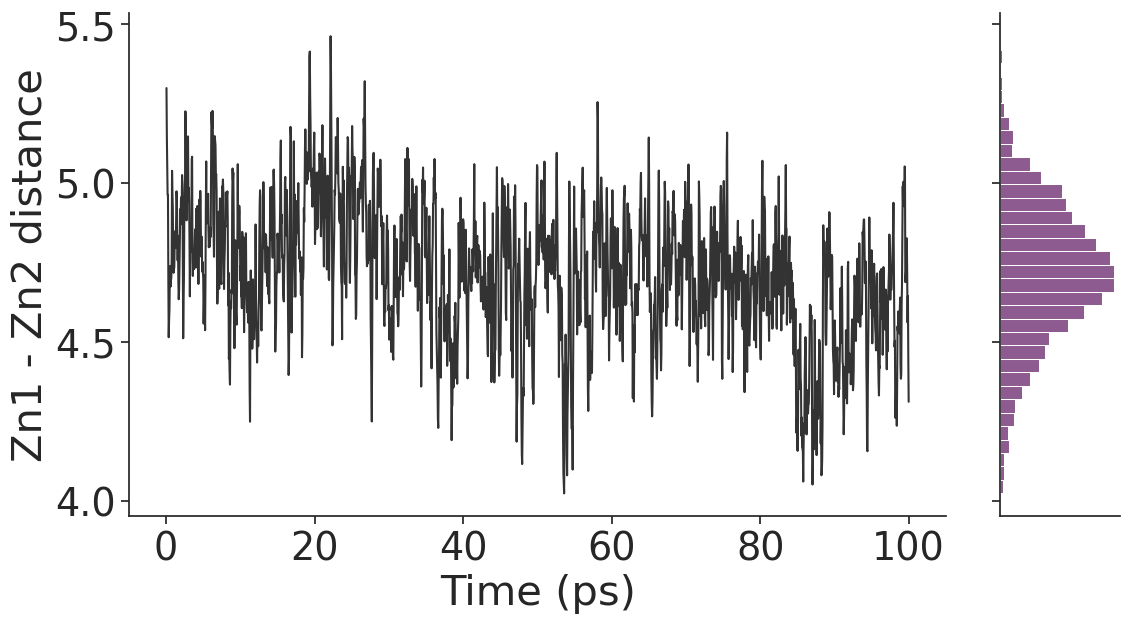

In [4]:
data = pd.read_csv(f"{dir}/WAT/ZN1-ZN2.dat", sep="\s+", names=["frames", "distance"], header=0)
# print(data.head())
frames = data["frames"].to_numpy()
time = frames * 0.05
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
# med = np.median(dataframe["distance"])
# print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ps)", "Zn1 - Zn2 distance")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/qmmm_WAT_zn_zn_distance.pdf", dpi=1000)

# Analysis plots

## Model 1 RMSD

  0%|          | 0/25000 [00:00<?, ?it/s]

0.6201966831574416
0.6431225589919842
0.1546046823639732


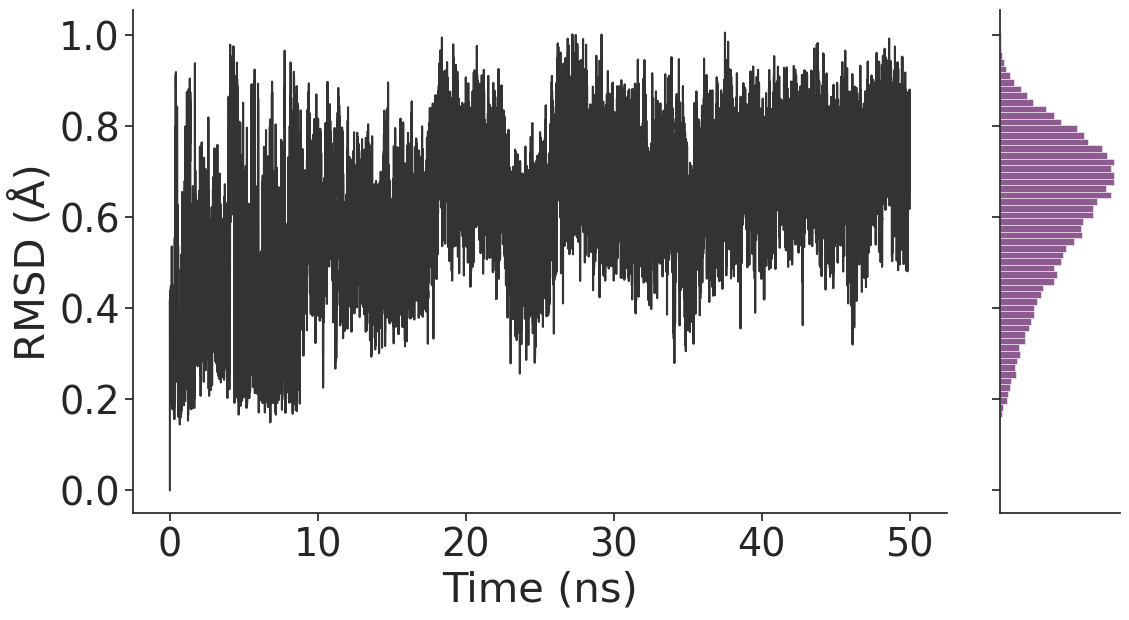

In [42]:
# data_path = "/backups/jguven/kpc2_most_recent_results/old_config_partially_protonated/md/outputs/ligand_1/"
data_path = "/home/jguven/projects/alchemistry/model_1_vim2/md/outputs/ligand_16/"
universe = mda.Universe(data_path + "md.prm7", data_path + "md.nc", topology_format="parm7")
ligand = universe.select_atoms("resname MOL")
reference = universe.select_atoms("resname MOL")
ligand_rmsd = MDAnalysis.analysis.rms.RMSD(ligand, reference, ref_frame=0, verbose=True)
ligand_rmsd.run()

time_ps = ligand_rmsd.results.rmsd.T[1]
rmsd = ligand_rmsd.results.rmsd.T[2]
time = time_ps / 1000

data = np.array([time, rmsd])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "rmsd"])
avg = np.mean(dataframe["rmsd"])
print(avg)
med = np.median(dataframe["rmsd"])
print(med)
std = np.std(dataframe["rmsd"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="rmsd", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["rmsd"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["rmsd"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ns)", "RMSD (Å)")
plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/model_1_vim2_rmsd.pdf", dpi=1000)

## Model 0 RMSD

  0%|          | 0/2500 [00:00<?, ?it/s]

0.26095987030099027
0.25382060694061875
0.06351081245341123


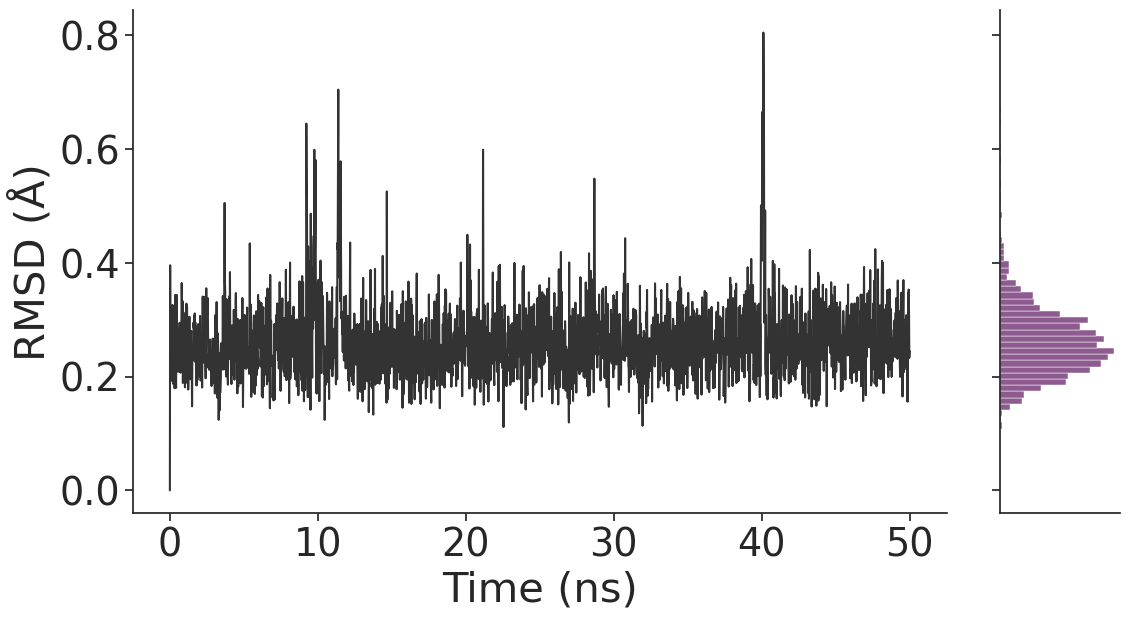

In [27]:
# data_path = "/backups/jguven/kpc2_most_recent_results/old_config_partially_protonated/md/outputs/ligand_1/"
data_path = "/home/jguven/projects/alchemistry/model_0_vim2/md/outputs/ligand_16/"
universe = mda.Universe(data_path + "md.prm7", data_path + "md.nc", topology_format="parm7")
ligand = universe.select_atoms("resname MOL")
reference = universe.select_atoms("resname MOL")
ligand_rmsd = MDAnalysis.analysis.rms.RMSD(ligand, reference, ref_frame=0, verbose=True)
ligand_rmsd.run()

time_ps = ligand_rmsd.results.rmsd.T[1]
rmsd = ligand_rmsd.results.rmsd.T[2]
time = time_ps / 1000

data = np.array([time, rmsd])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "rmsd"])
avg = np.mean(dataframe["rmsd"])
print(avg)
med = np.median(dataframe["rmsd"])
print(med)
std = np.std(dataframe["rmsd"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="rmsd", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["rmsd"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["rmsd"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ns)", "RMSD (Å)")
plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/model_0_vim2_rmsd.pdf", dpi=1000)

## KPC-2 RMSD

  0%|          | 0/2500 [00:00<?, ?it/s]

1.0512978318521728
1.0996066113676486
0.21938823661298257


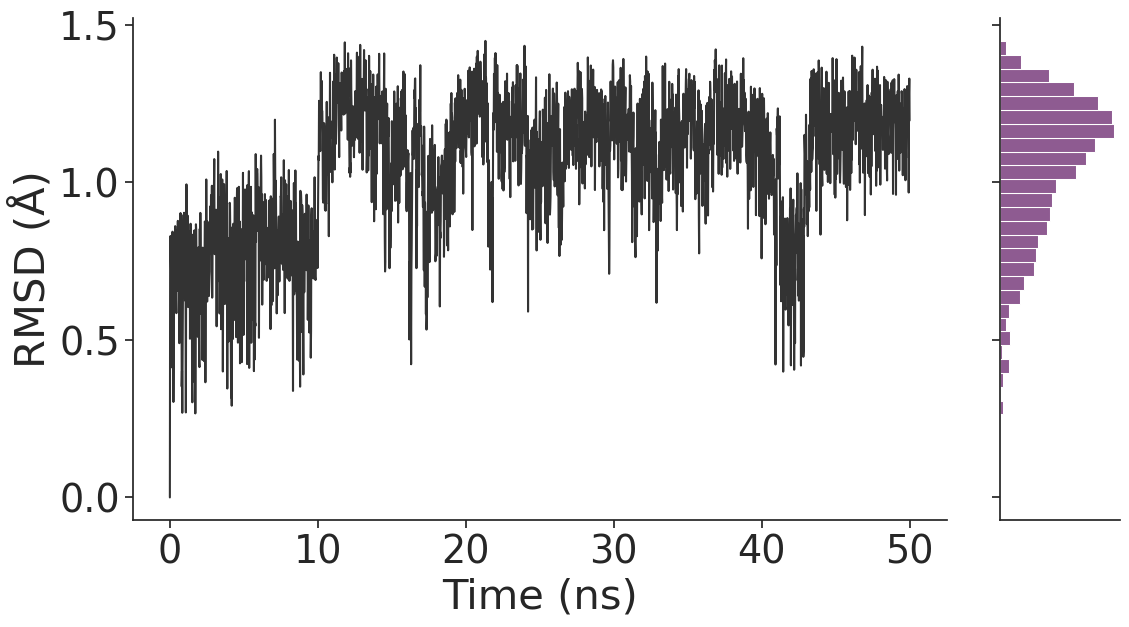

In [21]:
data_path = "/backups/jguven/kpc2_most_recent_results/old_config_partially_protonated/md/outputs/ligand_1/"
universe = mda.Universe(data_path + "md.prm7", data_path + "md.nc", topology_format="parm7")
ligand = universe.select_atoms("resname MOL")
reference = universe.select_atoms("resname MOL")
ligand_rmsd = MDAnalysis.analysis.rms.RMSD(ligand, reference, ref_frame=0, verbose=True)
ligand_rmsd.run()

time_ps = ligand_rmsd.results.rmsd.T[1]
rmsd = ligand_rmsd.results.rmsd.T[2]
time = time_ps / 1000

data = np.array([time, rmsd])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "rmsd"])
avg = np.mean(dataframe["rmsd"])
print(avg)
med = np.median(dataframe["rmsd"])
print(med)
std = np.std(dataframe["rmsd"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="rmsd", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["rmsd"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["rmsd"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ns)", "RMSD (Å)")
plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/kpc2_rmsd.pdf", dpi=1000)

4.352934534
4.059630500000001
0.8593967254928178


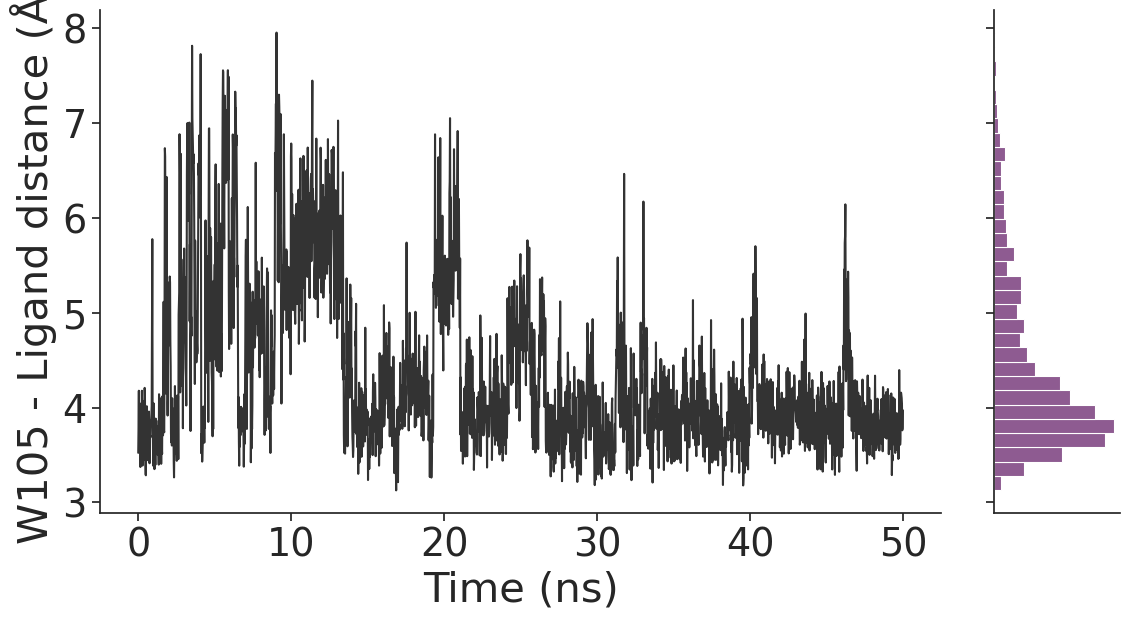

In [23]:
data = pd.read_csv("/backups/jguven/kpc2_most_recent_results/old_config_partially_protonated/md/outputs/ligand_1/trp_ligand_distance.dat", sep="\s+", names=["frames", "distance"], header=None)

frames = data["frames"].to_numpy()
time = frames / 50
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
med = np.median(dataframe["distance"])
print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ns)", "W105 - Ligand distance (Å)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/kpc2_trp105_lig_distance.pdf")

## Model 0 Distances

5.7631983168000005
6.18989
1.1921014154446627


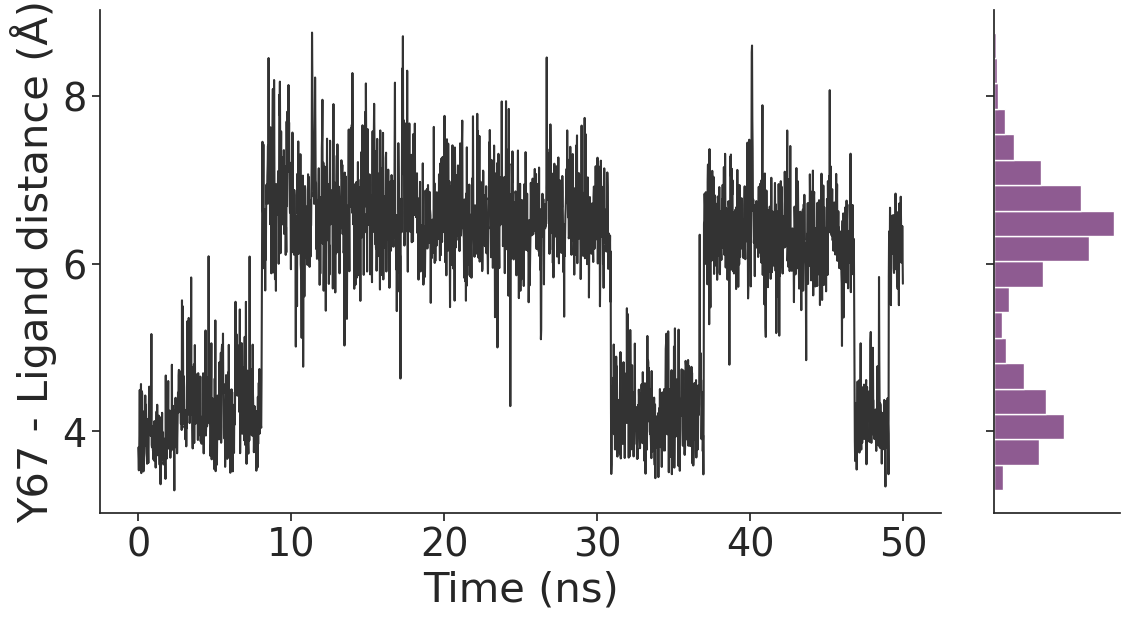

In [41]:
data = pd.read_csv("/home/jguven/projects/alchemistry/model_0_vim2/md/outputs/ligand_16/tyr38_ligand.dat", sep="\s+", names=["frames", "distance"], header=None)

frames = data["frames"].to_numpy()
time = frames / 50
distance = data["distance"].to_numpy()


data = np.array([time, distance])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "distance"])
avg = np.mean(dataframe["distance"])
print(avg)
med = np.median(dataframe["distance"])
print(med)
std = np.std(dataframe["distance"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="distance", kind="scatter", color=color,)
sns.set_theme(font_scale=2.5, style="ticks")
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["distance"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["distance"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(12, 8)
plot.set_axis_labels("Time (ns)", "Y67 - Ligand distance (Å)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/alchemistry_paper/model_0_vim2_ligand_16_y67_lig_distance.pdf")

## Playground

1.03452776
1.04345
0.11543157889149051


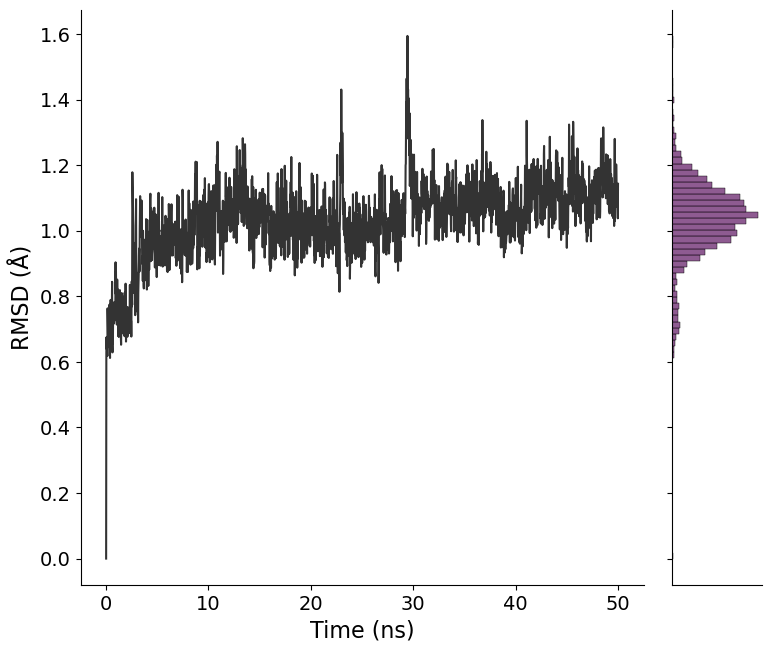

In [23]:
protein_bb = pd.read_csv(data_path + "protein_backboneCA_rmsd.dat", sep="\s+")
# time = h3_df["#Frame"].to_numpy() / 50
# rmsd_h3 = h3_df["rmsd_h3"].to_numpy()
# data = np.array([time, rmsd])
# data_transpose = np.transpose(data)

dataframe = protein_bb.copy()
dataframe["#Frame"] = dataframe["#Frame"] / 50
avg = np.mean(dataframe["rmsd_1"])
print(avg)
med = np.median(dataframe["rmsd_1"])
print(med)
std = np.std(dataframe["rmsd_1"])
print(std)

plot = sns.jointplot(data=dataframe, x="#Frame", y="rmsd_1", kind="scatter", color=color,)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["#Frame"], dataframe["rmsd_1"], s=0)
plot.ax_joint.plot(dataframe["#Frame"], dataframe["rmsd_1"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "RMSD (Å)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/protein_bb_combined_rmsd_heavy_atoms.png")

0.41095532
0.41
0.06161279483757899


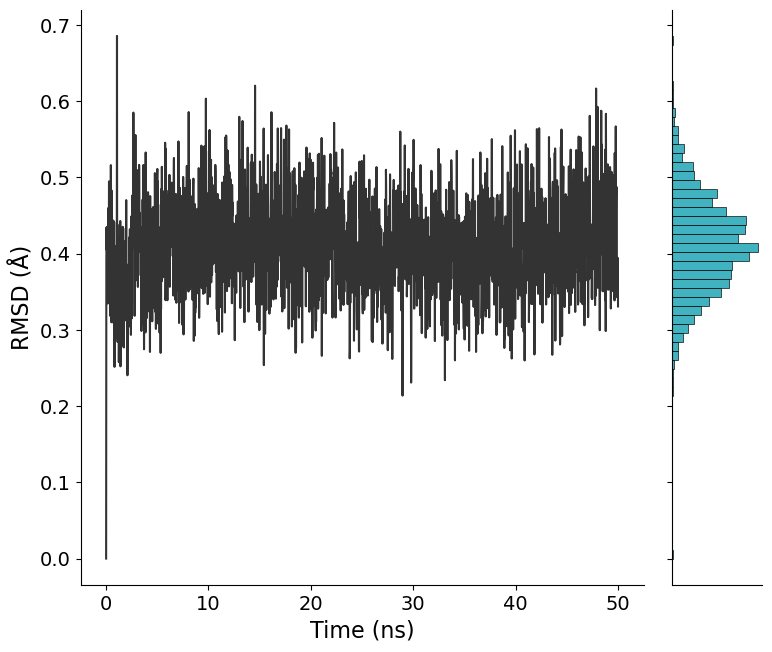

In [88]:
protein_bb = pd.read_csv(data_path + "dch_heavy_atoms_rmsd.dat", sep="\s+")
# time = h3_df["#Frame"].to_numpy() / 50
# rmsd_h3 = h3_df["rmsd_h3"].to_numpy()
# data = np.array([time, rmsd])
# data_transpose = np.transpose(data)

dataframe = protein_bb.copy()
dataframe["#Frame"] = dataframe["#Frame"] / 50
avg = np.mean(dataframe["rmsd_dch"])
print(avg)
med = np.median(dataframe["rmsd_dch"])
print(med)
std = np.std(dataframe["rmsd_dch"])
print(std)

plot = sns.jointplot(data=dataframe, x="#Frame", y="rmsd_dch", kind="scatter", color=color,)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["#Frame"], dataframe["rmsd_dch"], s=0)
plot.ax_joint.plot(dataframe["#Frame"], dataframe["rmsd_dch"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "RMSD (Å)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/dch_combined_rmsd_heavy_atoms.png")

0.27188500000000004
0.2671
0.05220587448745591


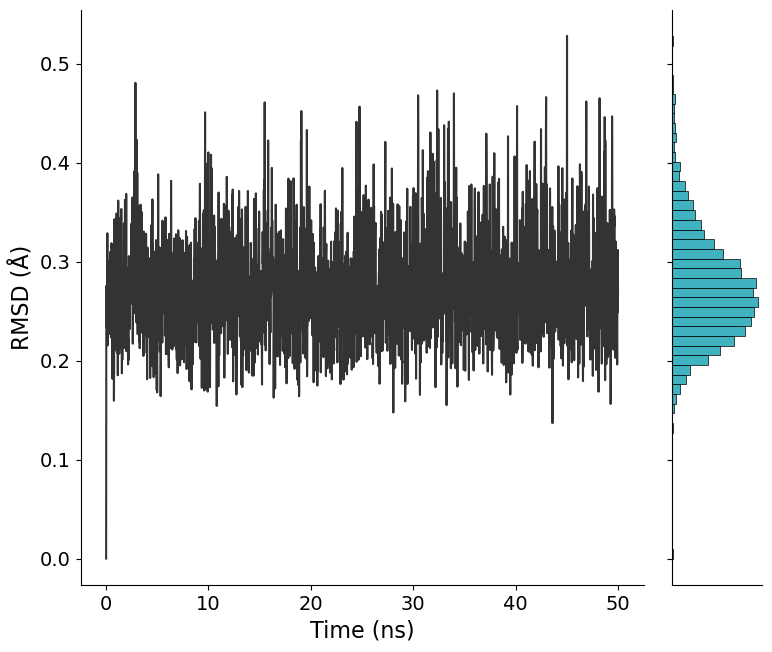

In [87]:
h3_df = pd.read_csv(data_path + "h3_heavy_atoms_rmsd.dat", sep="\s+")
# time = h3_df["#Frame"].to_numpy() / 50
# rmsd_h3 = h3_df["rmsd_h3"].to_numpy()
# data = np.array([time, rmsd])
# data_transpose = np.transpose(data)

dataframe = h3_df.copy()
dataframe["#Frame"] = dataframe["#Frame"] / 50
avg = np.mean(dataframe["rmsd_h3"])
print(avg)
med = np.median(dataframe["rmsd_h3"])
print(med)
std = np.std(dataframe["rmsd_h3"])
print(std)

plot = sns.jointplot(data=dataframe, x="#Frame", y="rmsd_h3", kind="scatter", color=color,)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["#Frame"], dataframe["rmsd_h3"], s=0)
plot.ax_joint.plot(dataframe["#Frame"], dataframe["rmsd_h3"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "RMSD (Å)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/h3_combined_rmsd_heavy_atoms.png")

0.26095987030099027
0.25382060694061875
0.06351081245341123


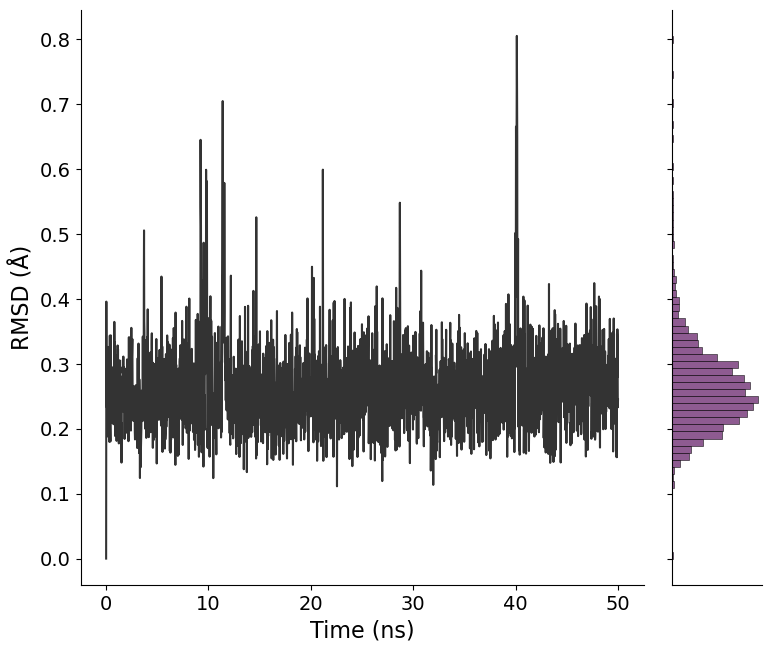

In [11]:
data_path = "/home/jguven/projects/alchemistry/model_1_vim2/md/outputs/ligand_16/"
universe = mda.Universe(data_path + "md.prm7", data_path + "md.nc", topology_format="parm7")

data = np.array([time, rmsd])
data_transpose = np.transpose(data)

dataframe = pd.DataFrame(data_transpose, columns=["time", "rmsd"])
avg = np.mean(dataframe["rmsd"])
print(avg)
med = np.median(dataframe["rmsd"])
print(med)
std = np.std(dataframe["rmsd"])
print(std)

plot = sns.jointplot(data=dataframe, x="time", y="rmsd", kind="scatter", color=color,)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(dataframe["time"], dataframe["rmsd"], s=0)
plot.ax_joint.plot(dataframe["time"], dataframe["rmsd"], color="black", alpha=0.8)
# plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "RMSD (Å)")
plt.setp(plot.ax_marg_x.patches, color="w")
# plt.setp(plot.ax_marg_x.spines, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
sns.despine()
plt.tight_layout()
plt.savefig("/home/jguven/Desktop/ligand_16_md_rmsd.pdf")


# VIM-2 Model 1

## Data

In [29]:
import plot
workdir = "/home/jguven/projects/alchemistry/model_1_vim2/"
plots_dir = "/home/jguven/Desktop/"

dg_df = pd.read_csv(f"{workdir}/outputs/cinnabar_absolute_dGs_vim2.csv")
dg_df.head()
ligands = dg_df["label"].tolist()
exp_dg = dg_df["exp_dG"].to_numpy()
exp_dg_err = dg_df["exp_err"].to_numpy()
calc_dg = dg_df["calc_dG"].to_numpy()
calc_err = dg_df["calc_err"].to_numpy()

shift = np.min(exp_dg)
# shift = 0
# from https://github.com/OpenFreeEnergy/cinnabar/blob/c140fea77d4019119ed40acd1a699b92ed6bbf10/cinnabar/plotting.py#L377
x_data = exp_dg - np.mean(exp_dg) + shift
y_data = calc_dg - np.mean(calc_dg) + shift

ddg_df = pd.read_csv(f"{workdir}/outputs/SOMD_results.csv", comment="#")
ddg_df.head()

transformations = ddg_df["transformation"].tolist()
ddg = ddg_df["average_ddg"].to_numpy()
ddg_err = ddg_df["propagated_error"].to_numpy()

exp_ddg, exp_ddg_err = plot.get_experimental_data(f"{workdir}/afe/experimental_K_i.csv", transformations)



## dG


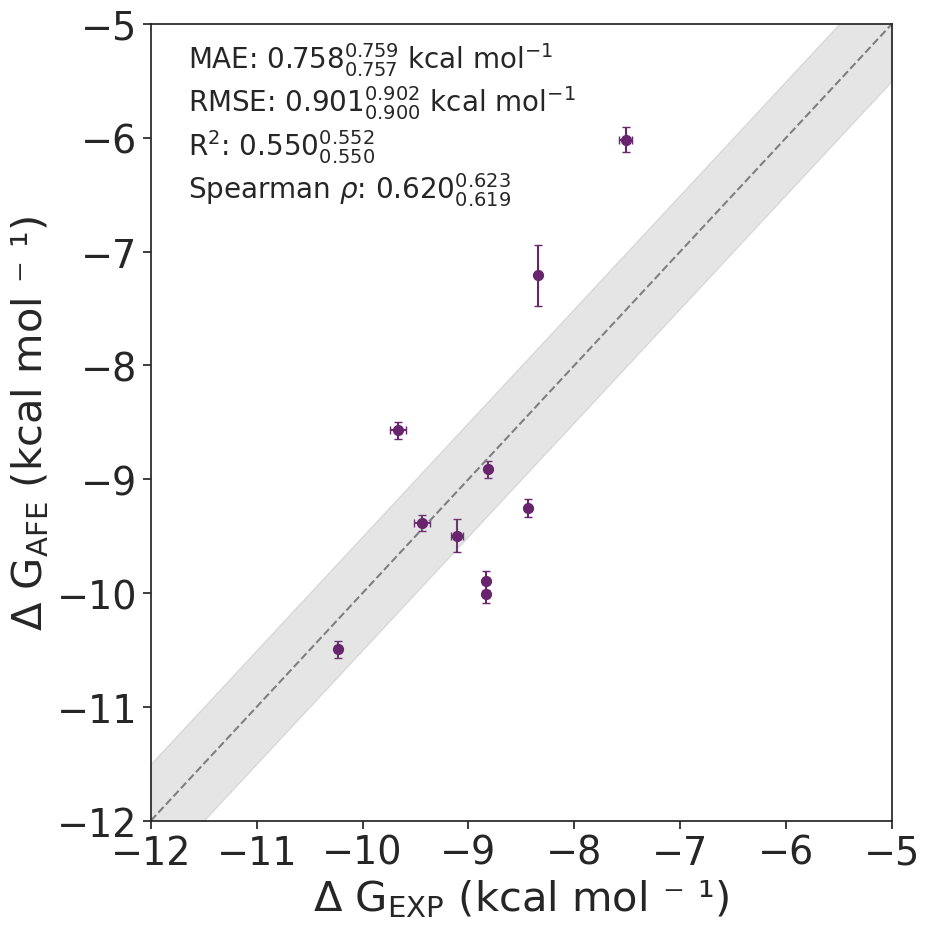

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_theme(style="ticks", font_scale=2.5)

ax.scatter(x_data, 
            y_data, 
            s=50, 
            color=color)

ax.errorbar(x_data,
            y_data,
            color=color,
            yerr=calc_err,
            xerr=exp_dg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


max_calculated = max(np.absolute(y_data)) + 1 
max_experimental = max(np.absolute(x_data)) + 1
max_y = max(max_calculated, max_experimental)
ax.plot([-12, -5], [-12, -5], color="gray", ls="--", zorder=-1)


max_calculated = max(y_data) + 1 
max_experimental = max(x_data) + 1
max_value = max(max_calculated, max_experimental)

min_calculated = min(y_data) - 1
min_experimental = min(x_data) - 1
min_value = min(min_calculated, min_experimental)

top = np.arange(-12+0.5, -5+1.5)
bottom = np.arange(-12-0.5, -5+0.5)
x = np.arange(-12, -5+1)
ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-12, -5)
ax.set_ylim(-12, -5)
ax.set_xlabel("$\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)")
ax.set_ylabel("$\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)")

box_properties = dict(boxstyle="square", facecolor="white", edgecolor="white")

# stats = plot.bootstrap_statistics(experimental=experimental_values, n_samples=1000, calculated=calculated_values, absolute=absolute)

# rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
#                                                                                                 lower = np.round(lower_bound[0], 3))

# mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
#                                                                                               lower = lower_bound[1])

# r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
#                                                                                               lower = lower_bound[2])

# spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
#                                                                                                                      lower = lower_bound[3])

# stats_text = "\n".join([rmse, mae, r2, spearman])

absolute_statistics, absolute_text_box = plot.output_statistics(x_data, y_data, absolute=True)

plt.xticks(np.arange(-12,-4, 1.0))
ax.text(0.05, 0.98, absolute_text_box, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)
plt.tight_layout()
fig.savefig("/home/jguven/Desktop/alchemistry_paper/vim2_model_1_dG.pdf", dpi=1000) 

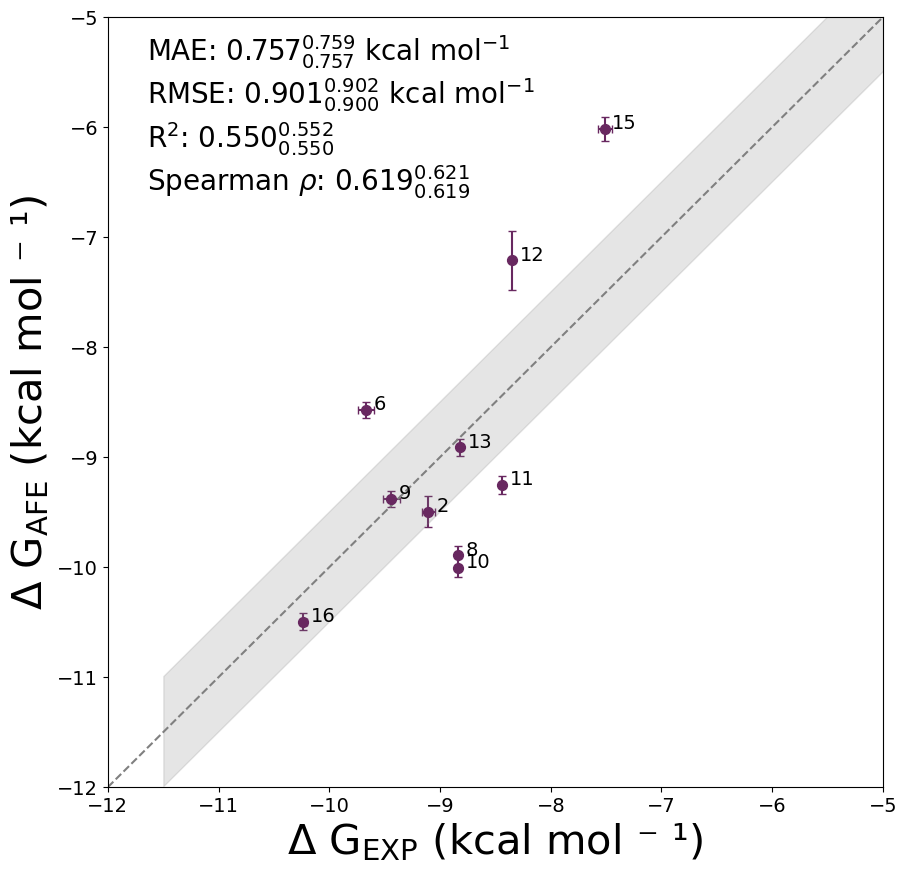

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# sns.set_theme(context="notebook", palette="colorblind", style="ticks", font_scale=2)

ax.scatter(x_data, 
            y_data, 
            s=50, 
            color="#682860")

ax.errorbar(x_data,
            y_data,
            color="#682860",
            yerr=calc_err,
            xerr=exp_dg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


max_calculated = max(np.absolute(y_data)) + 1 
max_experimental = max(np.absolute(x_data)) + 1
max_y = max(max_calculated, max_experimental)
ax.plot([-12, -5], [-12, -5], color="gray", ls="--", zorder=-1)


max_calculated = max(y_data) + 1 
max_experimental = max(x_data) + 1
max_value = max(max_calculated, max_experimental)

min_calculated = min(y_data) - 1
min_experimental = min(x_data) - 1
min_value = min(min_calculated, min_experimental)

top = np.arange(min_value+0.5, max_value+1.5)
bottom = np.arange(min_value-0.5, max_value+0.5)
x = np.arange(min_value, max_value+1)
ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-12, -5)
ax.set_ylim(-12, -5)
ax.set_xlabel("$\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

box_properties = dict(boxstyle="square", facecolor="white", edgecolor="white")

# rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
#                                                                                                 lower = np.round(lower_bound[0], 3))

# mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
#                                                                                               lower = lower_bound[1])

# r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
#                                                                                               lower = lower_bound[2])

# spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
#                                                                                                                      lower = lower_bound[3])

# stats_text = "\n".join([rmse, mae, r2, spearman])

absolute_statistics, absolute_text_box = plot.output_statistics(x_data, y_data, absolute=True)


ax.text(0.05, 0.98, absolute_text_box, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)


labels = [name.replace("ligand_", "") for name in ligands]
for i in range(len(labels)):
    ax.annotate(labels[i], (x_data[i] + 0.07, y_data[i]), fontsize=14)


## ddG

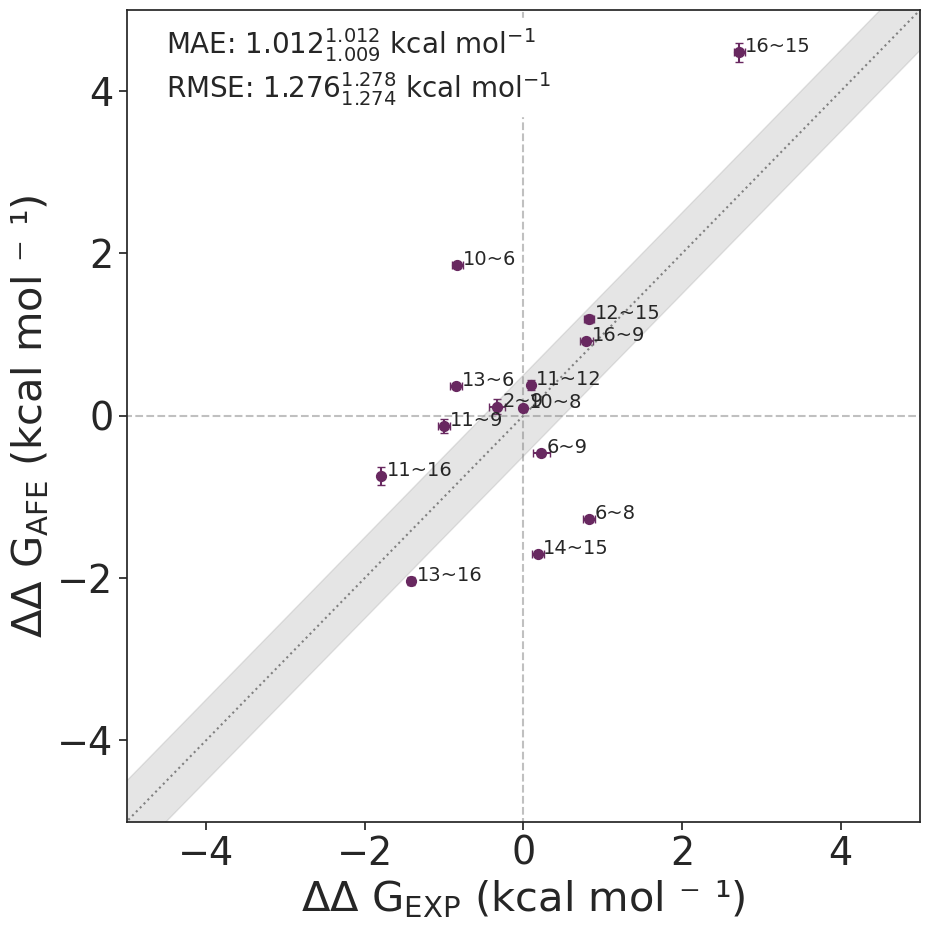

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_theme(style="ticks", font_scale=2.5)

ax.scatter(exp_ddg, 
           ddg, 
            s=50, 
            color="#682860")

ax.errorbar(exp_ddg,
            ddg,
            color="#682860",
            yerr=ddg_err,
            xerr=exp_ddg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


# max_calculated = max(np.absolute(ddg)) + 1 
# max_experimental = max(np.absolute(exp_ddg_err)) + 1
# max_y = max(max_calculated, max_experimental)
# ax.plot([max_y, -7], [-15, -7], color="gray", ls="--", zorder=-1)

# max_calculated = max(y_data) + 1 
# max_experimental = max(x_data) + 1
# max_value = max(max_calculated, max_experimental)

# min_calculated = min(y_data) - 1
# min_experimental = min(x_data) - 1
# min_value = min(min_calculated, min_experimental)




# top = np.arange(min_value+0.5, max_value+1.5)
# bottom = np.arange(min_value-0.5, max_value+0.5)
# x = np.arange(min_value, max_value+1)
# ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.vlines(0, -6, 6, color="silver", linestyle="--", zorder=-1)
ax.hlines(0, -6, 6, color="silver", linestyle="--", zorder=-1)

top = np.arange(-6+0.5, 6+1.5)
bottom = np.arange(-6-0.5, 6+0.5)
x = np.arange(-6,6+1)
ax.fill_between(x, bottom, top, color="gray", alpha=0.2, zorder=-1)

ax.plot([-6, 6], [-6, 6], color="gray", linestyle=":", zorder=-1)

ax.set_xlabel("$\Delta\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

box_properties = dict(boxstyle="square", facecolor="white", edgecolor="white")

# rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
#                                                                                                 lower = np.round(lower_bound[0], 3))

# mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
#                                                                                               lower = lower_bound[1])

# r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
#                                                                                               lower = lower_bound[2])

# spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
#                                                                                                                      lower = lower_bound[3])

# stats_text = "\n".join([rmse, mae, r2, spearman])

statistics, text_box = plot.output_statistics(exp_ddg, ddg, absolute=False)

ax.text(0.05, 0.98, text_box, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)
labels = [name.replace("ligand_", "") for name in transformations]
for i in range(len(labels)):
    ax.annotate(labels[i], (exp_ddg[i] + 0.07, ddg[i]), fontsize=14)


plt.tight_layout()
fig.savefig(f"/home/jguven/Desktop/alchemistry_paper/vim2_model_1_ddG.pdf", dpi=1000) 

# VIM-2 Model 0

## Data

In [32]:
workdir = "/home/jguven/projects/alchemistry/model_0_vim2/"
plots_dir = "/home/jguven/Desktop/alchemistry_paper/"

dg_df = pd.read_csv(f"{workdir}/outputs/cinnabar_absolute_dGs_vim2.csv")
dg_df.head()
ligands = dg_df["label"].tolist()
exp_dg = dg_df["exp_dG"].to_numpy()
exp_dg_err = dg_df["exp_err"].to_numpy()
calc_dg = dg_df["calc_dG"].to_numpy()
calc_err = dg_df["calc_err"].to_numpy()

shift = np.min(exp_dg)
# shift = 0
# from https://github.com/OpenFreeEnergy/cinnabar/blob/c140fea77d4019119ed40acd1a699b92ed6bbf10/cinnabar/plotting.py#L377
x_data = exp_dg - np.mean(exp_dg) + shift
y_data = calc_dg - np.mean(calc_dg) + shift

ddg_df = pd.read_csv(f"{workdir}/outputs/SOMD_results.csv", comment="#")
ddg_df.head()

transformations = ddg_df["transformation"].tolist()
ddg = ddg_df["average_ddg"].to_numpy()
ddg_err = ddg_df["propagated_error"].to_numpy()

exp_ddg, exp_ddg_err = plot.get_experimental_data(f"{workdir}/afe/experimental_K_i.csv", transformations)



## dG

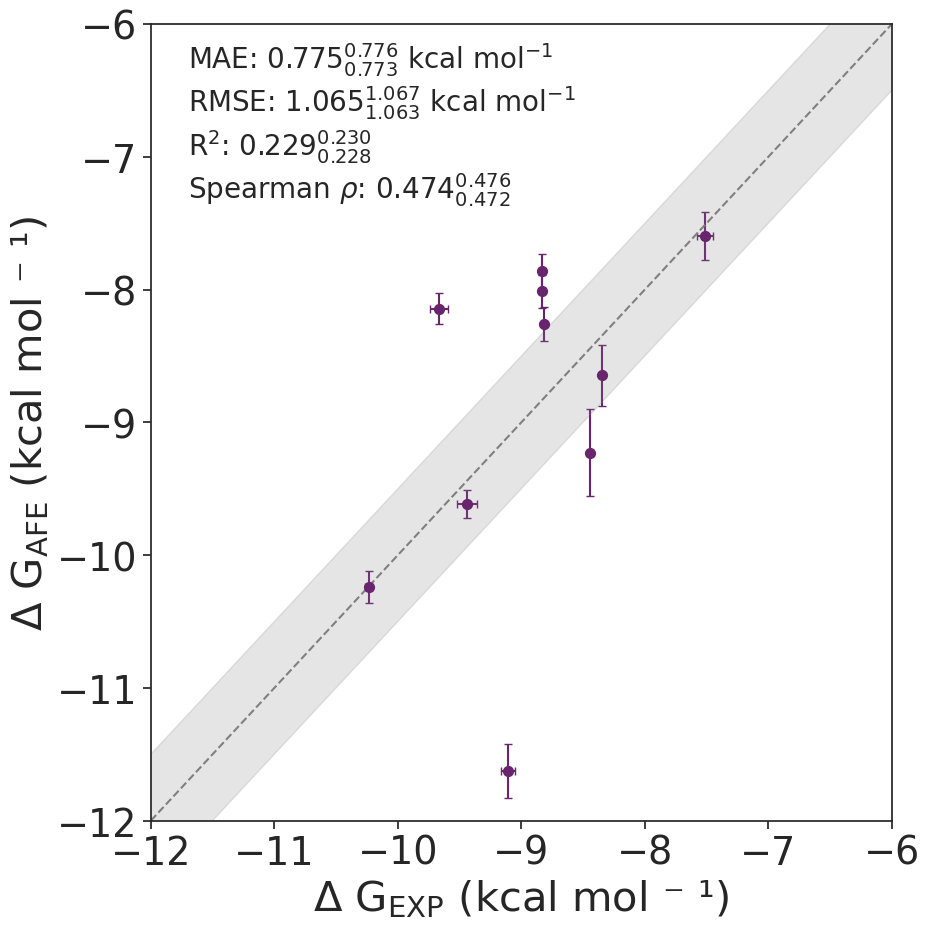

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_theme(style="ticks", font_scale=2.5)

ax.scatter(x_data, 
            y_data, 
            s=50, 
            color=color)

ax.errorbar(x_data,
            y_data,
            color=color,
            yerr=calc_err,
            xerr=exp_dg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


max_calculated = max(np.absolute(y_data)) + 1 
max_experimental = max(np.absolute(x_data)) + 1
max_y = max(max_calculated, max_experimental)
ax.plot([-12, -6], [-12, -6], color="gray", ls="--", zorder=-1)


max_calculated = max(y_data) + 1 
max_experimental = max(x_data) + 1
max_value = max(max_calculated, max_experimental)

min_calculated = min(y_data) - 1
min_experimental = min(x_data) - 1
min_value = min(min_calculated, min_experimental)

top = np.arange(min_value+0.5, max_value+1.5)
bottom = np.arange(min_value-0.5, max_value+0.5)
x = np.arange(min_value, max_value+1)
ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-12, -6)
ax.set_ylim(-12, -6)
ax.set_xlabel("$\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

box_properties = dict(boxstyle="square", facecolor="white", edgecolor="white")

# rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
#                                                                                                 lower = np.round(lower_bound[0], 3))

# mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
#                                                                                               lower = lower_bound[1])

# r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
#                                                                                               lower = lower_bound[2])

# spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
#                                                                                                                      lower = lower_bound[3])

# stats_text = "\n".join([rmse, mae, r2, spearman])

absolute_statistics, absolute_text_box = plot.output_statistics(x_data, y_data, absolute=True)


ax.text(0.05, 0.98, absolute_text_box, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)
plt.tight_layout()
fig.savefig(f"{plots_dir}/vim2_model_0_dG.pdf", dpi=1000) 

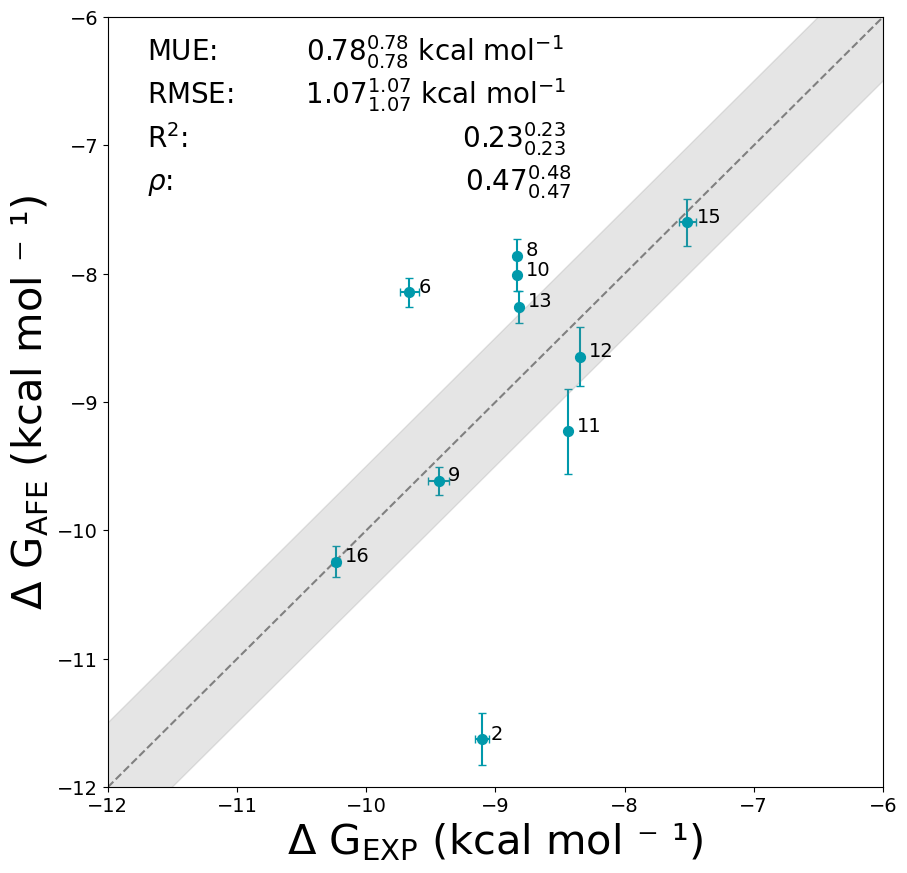

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# sns.set_theme(context="notebook", palette="colorblind", style="ticks", font_scale=2)

ax.scatter(x_data, 
            y_data, 
            s=50, 
            color=color)

ax.errorbar(x_data,
            y_data,
            color=color,
            yerr=calc_err,
            xerr=exp_dg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


max_calculated = max(np.absolute(y_data)) + 1 
max_experimental = max(np.absolute(x_data)) + 1
max_y = max(max_calculated, max_experimental)
ax.plot([-12, -6], [-12, -6], color="gray", ls="--", zorder=-1)


max_calculated = max(y_data) + 1 
max_experimental = max(x_data) + 1
max_value = max(max_calculated, max_experimental)

min_calculated = min(y_data) - 1
min_experimental = min(x_data) - 1
min_value = min(min_calculated, min_experimental)

top = np.arange(min_value+0.5, max_value+1.5)
bottom = np.arange(min_value-0.5, max_value+0.5)
x = np.arange(min_value, max_value+1)
ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-12, -6)
ax.set_ylim(-12, -6)
ax.set_xlabel("$\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

box_properties = dict(boxstyle="square", facecolor="white", edgecolor="white")

# rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
#                                                                                                 lower = np.round(lower_bound[0], 3))

# mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
#                                                                                               lower = lower_bound[1])

# r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
#                                                                                               lower = lower_bound[2])

# spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
#                                                                                                                      lower = lower_bound[3])

# stats_text = "\n".join([rmse, mae, r2, spearman])

absolute_statistics, absolute_text_box = plot.output_statistics(x_data, y_data, absolute=True)


ax.text(0.05, 0.98, absolute_text_box, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)


labels = [name.replace("ligand_", "") for name in ligands]
for i in range(len(labels)):
    ax.annotate(labels[i], (x_data[i] + 0.07, y_data[i]), fontsize=14)

plt.savefig("/home/jguven/vim2_model_0_new", dpi=1000, )

## ddG

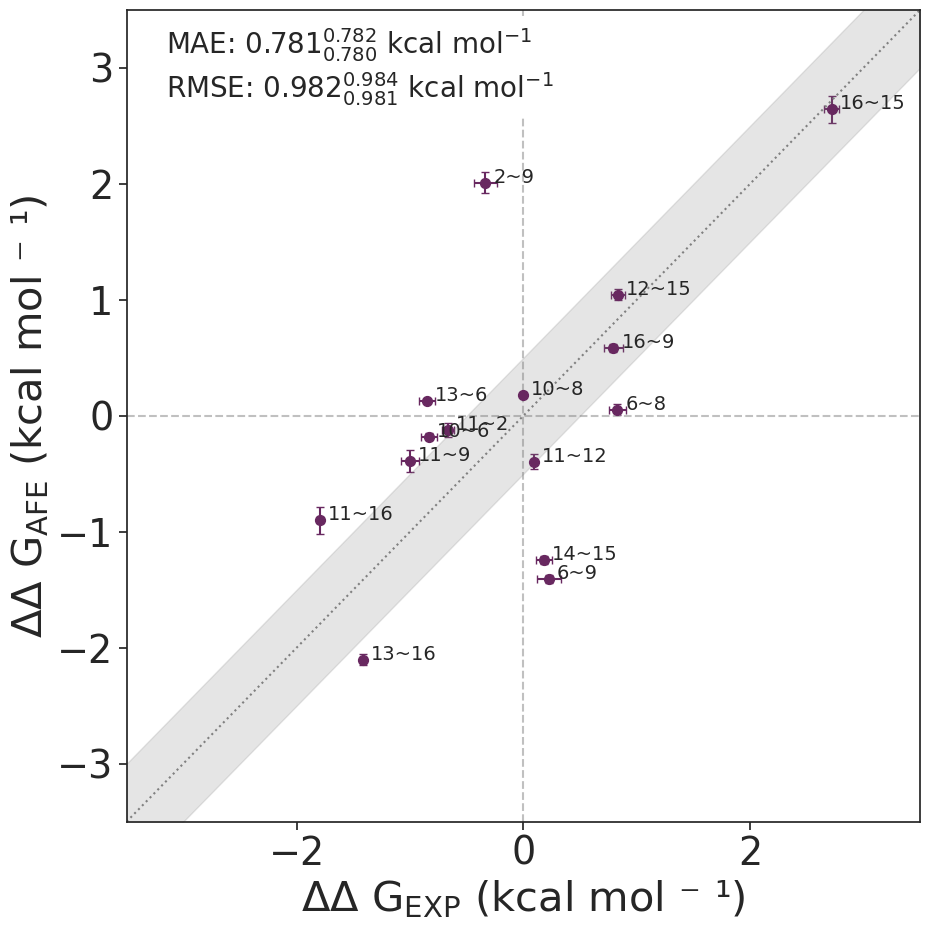

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_theme(style="ticks", font_scale=2.5)

ax.scatter(exp_ddg, 
           ddg, 
            s=50, 
            color="#682860")

ax.errorbar(exp_ddg,
            ddg,
            color="#682860",
            yerr=ddg_err,
            xerr=exp_ddg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


# max_calculated = max(np.absolute(ddg)) + 1 
# max_experimental = max(np.absolute(exp_ddg_err)) + 1
# max_y = max(max_calculated, max_experimental)
# ax.plot([max_y, -7], [-15, -7], color="gray", ls="--", zorder=-1)

# max_calculated = max(y_data) + 1 
# max_experimental = max(x_data) + 1
# max_value = max(max_calculated, max_experimental)

# min_calculated = min(y_data) - 1
# min_experimental = min(x_data) - 1
# min_value = min(min_calculated, min_experimental)




# top = np.arange(min_value+0.5, max_value+1.5)
# bottom = np.arange(min_value-0.5, max_value+0.5)
# x = np.arange(min_value, max_value+1)
# ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.vlines(0, -3.5, 3.5, color="silver", linestyle="--", zorder=-1)
ax.hlines(0, -3.5, 3.5, color="silver", linestyle="--", zorder=-1)

top = np.arange(-3.5+0.5, 3.5+1.5)
bottom = np.arange(-3.5-0.5, 3.5+0.5)
x = np.arange(-3.5, 3.5+1)
ax.fill_between(x, bottom, top, color="gray", alpha=0.2, zorder=-1)

ax.plot([-3.5, 3.5], [-3.5, 3.5], color="gray", linestyle=":", zorder=-1)

ax.set_xlabel("$\Delta\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

box_properties = dict(boxstyle="square", facecolor="white", edgecolor="white")

# rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
#                                                                                                 lower = np.round(lower_bound[0], 3))

# mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
#                                                                                               lower = lower_bound[1])

# r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
#                                                                                               lower = lower_bound[2])

# spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
#                                                                                                                      lower = lower_bound[3])

# stats_text = "\n".join([rmse, mae, r2, spearman])

statistics, text_box = plot.output_statistics(exp_ddg, ddg, absolute=False)

ax.text(0.05, 0.98, text_box, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)
labels = [name.replace("ligand_", "") for name in transformations]
for i in range(len(labels)):
    ax.annotate(labels[i], (exp_ddg[i] + 0.07, ddg[i]), fontsize=14)


plt.tight_layout()
fig.savefig(f"{plots_dir}/vim2_model_0_ddG.pdf", dpi=1000) 

# KPC-2

## Data

In [35]:
workdir = "/backups/jguven/kpc2_most_recent_results/old_config_partially_protonated/"
plots_dir = "/home/jguven/Desktop/alchemistry_paper/"

dg_df = pd.read_csv(f"{workdir}/outputs/cinnabar_absolute_dGs_kpc2.csv")
dg_df.head()
ligands = dg_df["label"].tolist()
exp_dg = dg_df["exp_dG"].to_numpy()
exp_dg_err = dg_df["exp_err"].to_numpy()
calc_dg = dg_df["calc_dG"].to_numpy()
calc_err = dg_df["calc_err"].to_numpy()

shift = np.min(exp_dg)
# shift = 0
# from https://github.com/OpenFreeEnergy/cinnabar/blob/c140fea77d4019119ed40acd1a699b92ed6bbf10/cinnabar/plotting.py#L377
x_data = exp_dg - np.mean(exp_dg) + shift
y_data = calc_dg - np.mean(calc_dg) + shift

ddg_df = pd.read_csv(f"{workdir}/outputs/SOMD_results.csv", comment="#")
ddg_df.head()

transformations = ddg_df["transformation"].tolist()
ddg = ddg_df["average_ddg"].to_numpy()
ddg_err = ddg_df["propagated_error"].to_numpy()

exp_ddg, exp_ddg_err = plot.get_experimental_data(f"{workdir}/afe/experimental_K_i.csv", transformations)

stats = pd.read_csv(f"{workdir}/outputs/absolute_statistics.csv", header=0, index_col=False).rename(columns={"Unnamed: 0": "stat"}).drop(columns="real")
print(stats.head())
stat_names = stats["stat"].tolist()

means = stats["mean_value"].to_numpy()
lower_bound = stats["lower_bound"].to_numpy()
upper_bound = stats["upper_bound"].to_numpy()


           stat  mean_value  lower_bound  upper_bound
0          rmse    0.596032     0.594938     0.596478
1           mue    0.433792     0.433026     0.434733
2    pearson_r2    0.864394     0.864293     0.865103
3  spearman_rho    0.946619     0.946448     0.947388


## dG

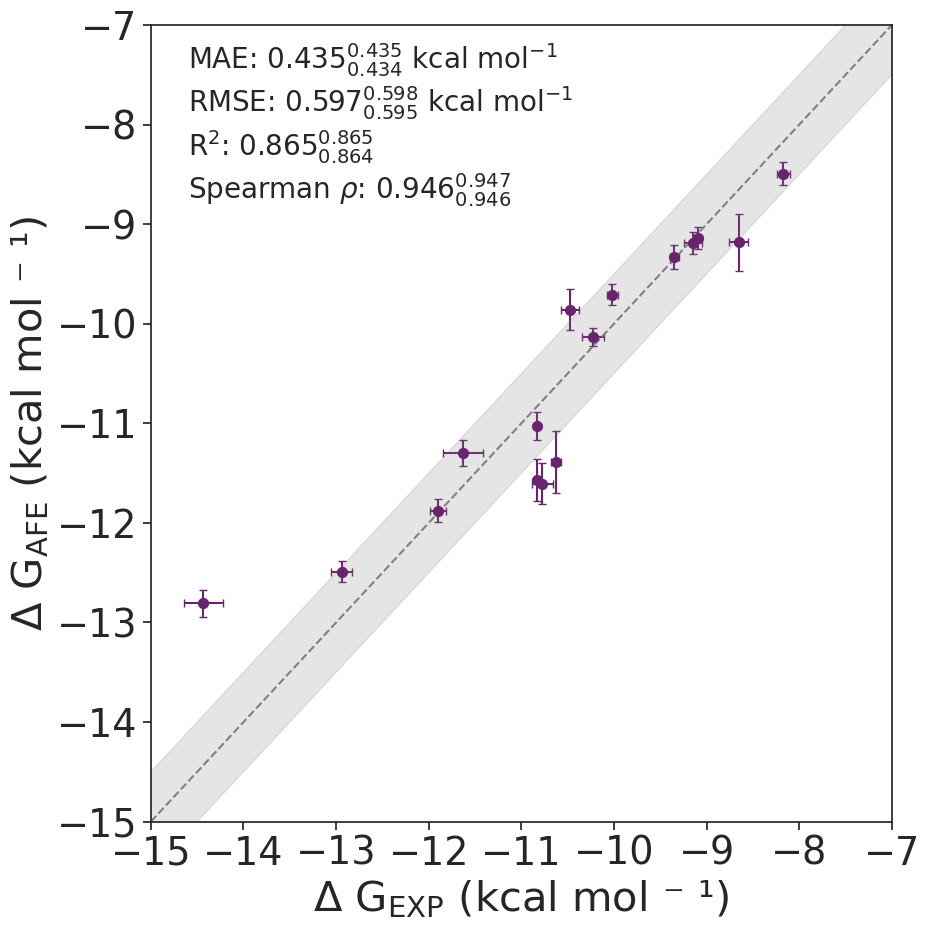

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_theme(style="ticks", font_scale=2.5)

ax.scatter(x_data, 
            y_data, 
            s=50, 
            color=color)

ax.errorbar(x_data,
            y_data,
            color=color,
            yerr=calc_err,
            xerr=exp_dg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


max_calculated = max(np.absolute(y_data)) + 1 
max_experimental = max(np.absolute(x_data)) + 1
max_y = max(max_calculated, max_experimental)
ax.plot([-15, -7], [-15, -7], color="gray", ls="--", zorder=-1)


max_calculated = max(y_data) + 1 
max_experimental = max(x_data) + 1
max_value = max(max_calculated, max_experimental)

min_calculated = min(y_data) - 1
min_experimental = min(x_data) - 1
min_value = min(min_calculated, min_experimental)

top = np.arange(min_value+0.5, max_value+1.5)
bottom = np.arange(min_value-0.5, max_value+0.5)
x = np.arange(min_value, max_value+1)
ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-15, -7)
ax.set_ylim(-15, -7)
ax.set_xlabel("$\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

box_properties = dict(boxstyle="square", facecolor="white", edgecolor="white")

# rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
#                                                                                                 lower = np.round(lower_bound[0], 3))

# mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
#                                                                                               lower = lower_bound[1])

# r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
#                                                                                               lower = lower_bound[2])

# spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
#                                                                                                                      lower = lower_bound[3])

# stats_text = "\n".join([rmse, mae, r2, spearman])

absolute_statistics, absolute_text_box = plot.output_statistics(x_data, y_data, absolute=True)

plt.xticks(np.arange(-15, -6, 1.0))
ax.text(0.05, 0.98, absolute_text_box, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)
plt.tight_layout()
fig.savefig(f"{plots_dir}/kpc2_dG.pdf", dpi=1000) 

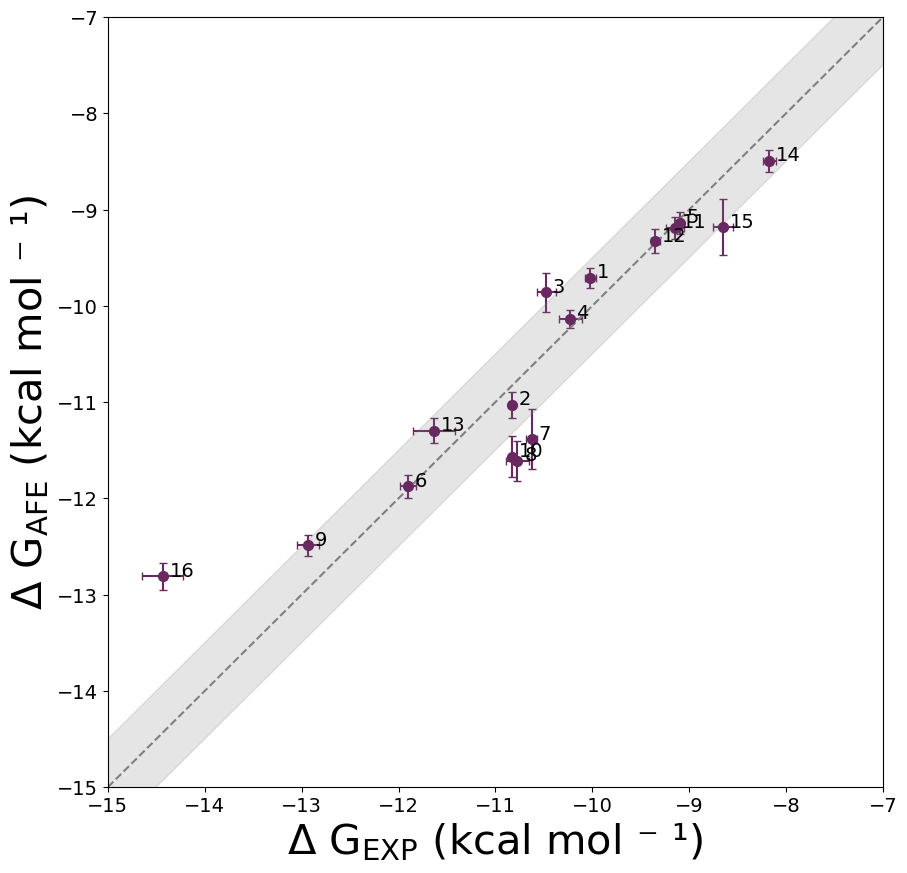

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# sns.set_theme(context="notebook", palette="colorblind", style="ticks", font_scale=2)

ax.scatter(x_data, 
            y_data, 
            s=50, 
            color="#682860")

ax.errorbar(x_data,
            y_data,
            color="#682860",
            yerr=calc_err,
            xerr=exp_dg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


max_calculated = max(np.absolute(y_data)) + 1 
max_experimental = max(np.absolute(x_data)) + 1
max_y = max(max_calculated, max_experimental)
ax.plot([-15, -7], [-15, -7], color="gray", ls="--", zorder=-1)


max_calculated = max(y_data) + 1 
max_experimental = max(x_data) + 1
max_value = max(max_calculated, max_experimental)

min_calculated = min(y_data) - 1
min_experimental = min(x_data) - 1
min_value = min(min_calculated, min_experimental)

top = np.arange(min_value+0.5, max_value+1.5)
bottom = np.arange(min_value-0.5, max_value+0.5)
x = np.arange(min_value, max_value+1)
ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-15, -7)
ax.set_ylim(-15, -7)
ax.set_xlabel("$\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)
labels = [name.replace("ligand_", "") for name in ligands]
for i in range(len(labels)):
    ax.annotate(labels[i], (x_data[i] + 0.07, y_data[i]), fontsize=14)


## ddG

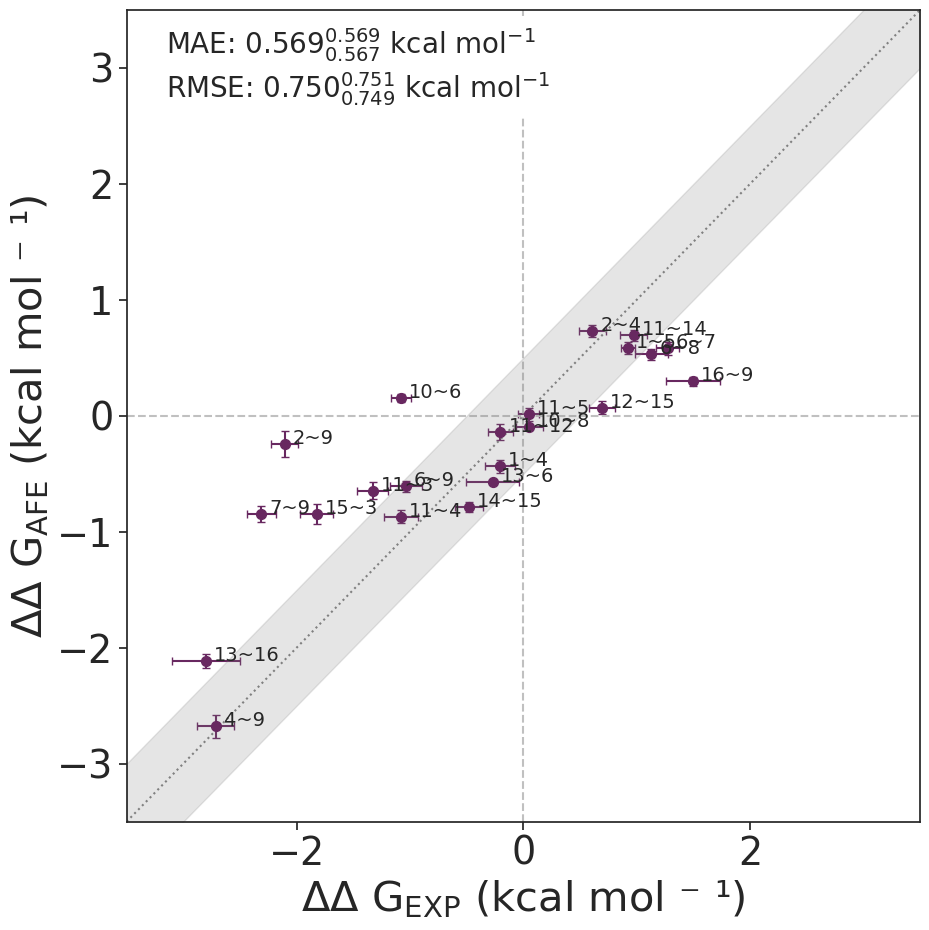

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_theme(style="ticks", font_scale=2.5)

ax.scatter(exp_ddg, 
           ddg, 
            s=50, 
            color="#682860")

ax.errorbar(exp_ddg,
            ddg,
            color="#682860",
            yerr=ddg_err,
            xerr=exp_ddg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


# max_calculated = max(np.absolute(ddg)) + 1 
# max_experimental = max(np.absolute(exp_ddg_err)) + 1
# max_y = max(max_calculated, max_experimental)
# ax.plot([max_y, -7], [-15, -7], color="gray", ls="--", zorder=-1)

# max_calculated = max(y_data) + 1 
# max_experimental = max(x_data) + 1
# max_value = max(max_calculated, max_experimental)

# min_calculated = min(y_data) - 1
# min_experimental = min(x_data) - 1
# min_value = min(min_calculated, min_experimental)




# top = np.arange(min_value+0.5, max_value+1.5)
# bottom = np.arange(min_value-0.5, max_value+0.5)
# x = np.arange(min_value, max_value+1)
# ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.vlines(0, -3.5, 3.5, color="silver", linestyle="--", zorder=-1)
ax.hlines(0, -3.5, 3.5, color="silver", linestyle="--", zorder=-1)

top = np.arange(-3.5+0.5, 3.5+1.5)
bottom = np.arange(-3.5-0.5, 3.5+0.5)
x = np.arange(-3.5, 3.5+1)
ax.fill_between(x, bottom, top, color="gray", alpha=0.2, zorder=-1)

ax.plot([-3.5, 3.5], [-3.5, 3.5], color="gray", linestyle=":", zorder=-1)

ax.set_xlabel("$\Delta\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

box_properties = dict(boxstyle="square", facecolor="white", edgecolor="white")

# rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
#                                                                                                 lower = np.round(lower_bound[0], 3))

# mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
#                                                                                               lower = lower_bound[1])

# r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
#                                                                                               lower = lower_bound[2])

# spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
#                                                                                                                      lower = lower_bound[3])

# stats_text = "\n".join([rmse, mae, r2, spearman])

statistics, text_box = plot.output_statistics(exp_ddg, ddg, absolute=False)

ax.text(0.05, 0.98, text_box, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)
labels = [name.replace("ligand_", "") for name in transformations]
for i in range(len(labels)):
    ax.annotate(labels[i], (exp_ddg[i] + 0.07, ddg[i]), fontsize=14)


plt.tight_layout()
fig.savefig(f"{plots_dir}/kpc2_ddG.pdf", dpi=1000) 

# Playground


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# sns.set_theme(context="notebook", palette="colorblind", style="ticks", font_scale=2)

ax.scatter(x_data, 
            y_data, 
            s=50, 
            color="#006374")

ax.errorbar(x_data,
            y_data,
            color="#006374",
            yerr=calc_err,
            xerr=exp_dg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


max_calculated = max(np.absolute(y_data)) + 1 
max_experimental = max(np.absolute(x_data)) + 1
max_y = max(max_calculated, max_experimental)
ax.plot([-15, -7], [-15, -7], color="gray", ls="--", zorder=-1)


max_calculated = max(y_data) + 1 
max_experimental = max(x_data) + 1
max_value = max(max_calculated, max_experimental)

min_calculated = min(y_data) - 1
min_experimental = min(x_data) - 1
min_value = min(min_calculated, min_experimental)

top = np.arange(min_value+0.5, max_value+1.5)
bottom = np.arange(min_value-0.5, max_value+0.5)
x = np.arange(min_value, max_value+1)
ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-15, -7)
ax.set_ylim(-15, -7)
ax.set_xlabel("$\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

box_properties = dict(boxstyle="square", facecolor="white")

rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
                                                                                                lower = np.round(lower_bound[0], 3))

mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
                                                                                              lower = lower_bound[1])

r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
                                                                                              lower = lower_bound[2])

spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
                                                                                                                     lower = lower_bound[3])

stats_text = "\n".join([rmse, mae, r2, spearman])

ax.text(0.05, 0.98, stats_text, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# sns.set_theme(context="notebook", palette="colorblind", style="ticks", font_scale=2)

ax.scatter(x_data, 
            y_data, 
            s=50, 
            color="#D0006F")

ax.errorbar(x_data,
            y_data,
            color="#D0006F",
            yerr=calc_err,
            xerr=exp_dg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


max_calculated = max(np.absolute(y_data)) + 1 
max_experimental = max(np.absolute(x_data)) + 1
max_y = max(max_calculated, max_experimental)
ax.plot([-15, -7], [-15, -7], color="gray", ls="--", zorder=-1)


max_calculated = max(y_data) + 1 
max_experimental = max(x_data) + 1
max_value = max(max_calculated, max_experimental)

min_calculated = min(y_data) - 1
min_experimental = min(x_data) - 1
min_value = min(min_calculated, min_experimental)

top = np.arange(min_value+0.5, max_value+1.5)
bottom = np.arange(min_value-0.5, max_value+0.5)
x = np.arange(min_value, max_value+1)
ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-15, -7)
ax.set_ylim(-15, -7)
ax.set_xlabel("$\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

box_properties = dict(boxstyle="square", facecolor="white")

rmse = f"RMSE: {means[0]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = np.round(upper_bound[0], 3),
                                                                                                lower = np.round(lower_bound[0], 3))

mae = f"MAE: {means[1]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[1],
                                                                                              lower = lower_bound[1])

r2 = r"R$^{2}$" + f": {means[2]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[2],
                                                                                              lower = lower_bound[2])

spearman = r"Spearman $\rho$: " + f"{means[3]:.3f}" + r"$^{{{upper:.3f}}}_{{{lower:.3f}}}$ kcal mol$^{{-1}}$".format(upper = upper_bound[3],
                                                                                                                     lower = lower_bound[3])

stats_text = "\n".join([rmse, mae, r2, spearman])

ax.text(0.05, 0.98, stats_text, transform=ax.transAxes, fontsize=20, verticalalignment="top", bbox=box_properties)


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# sns.set_theme(context="notebook", palette="colorblind", style="ticks", font_scale=2)

ax.scatter(x_data, 
            y_data, 
            s=50, 
            color="#D0006F")

ax.errorbar(x_data,
            y_data,
            color="#D0006F",
            yerr=calc_err,
            xerr=exp_dg_err,
            capsize=3,
            linestyle="",
            zorder=-1)


max_calculated = max(np.absolute(y_data)) + 1 
max_experimental = max(np.absolute(x_data)) + 1
max_y = max(max_calculated, max_experimental)
ax.plot([-15, -7], [-15, -7], color="gray", ls="--", zorder=-1)


max_calculated = max(y_data) + 1 
max_experimental = max(x_data) + 1
max_value = max(max_calculated, max_experimental)

min_calculated = min(y_data) - 1
min_experimental = min(x_data) - 1
min_value = min(min_calculated, min_experimental)

top = np.arange(min_value+0.5, max_value+1.5)
bottom = np.arange(min_value-0.5, max_value+0.5)
x = np.arange(min_value, max_value+1)
ax.fill_between(x, bottom, top, alpha=0.2, color="grey", zorder=-1)
ax.set_xlim(-15, -7)
ax.set_ylim(-15, -7)
ax.set_xlabel("$\Delta$ G$_\mathrm{EXP}$ (kcal mol \u207B \u00B9)", fontsize=30)
ax.set_ylabel("$\Delta$ G$_\mathrm{AFE}$ (kcal mol \u207B \u00B9)", fontsize=30)

    
labels = [name.replace("ligand_", "") for name in ligands]
for i in range(len(labels)):
    ax.annotate(labels[i], (x_data[i] + 0.07, y_data[i]), fontsize=14)
